In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Dataset .csv")

In [4]:
df.head(5)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [5]:
print(df.describe)

<bound method NDFrame.describe of       Restaurant ID           Restaurant Name  Country Code              City  \
0           6317637          Le Petit Souffle           162       Makati City   
1           6304287          Izakaya Kikufuji           162       Makati City   
2           6300002    Heat - Edsa Shangri-La           162  Mandaluyong City   
3           6318506                      Ooma           162  Mandaluyong City   
4           6314302               Sambo Kojin           162  Mandaluyong City   
...             ...                       ...           ...               ...   
9546        5915730               Naml۱ Gurme           208         ��stanbul   
9547        5908749              Ceviz A��ac۱           208         ��stanbul   
9548        5915807                     Huqqa           208         ��stanbul   
9549        5916112               A���k Kahve           208         ��stanbul   
9550        5927402  Walter's Coffee Roastery           208         ��stanb

Determining the Total number of Rows and Columns

In [6]:
print(df.shape)

(9551, 21)


In [7]:
print(df['Cuisines'])

0             French, Japanese, Desserts
1                               Japanese
2       Seafood, Asian, Filipino, Indian
3                        Japanese, Sushi
4                       Japanese, Korean
                      ...               
9546                             Turkish
9547     World Cuisine, Patisserie, Cafe
9548              Italian, World Cuisine
9549                     Restaurant Cafe
9550                                Cafe
Name: Cuisines, Length: 9551, dtype: object


Task 1: Top Cuisines
Determine the top three most
common cuisines in the dataset.


In [8]:
cuisine_counts=df['Cuisines'].str.split(',').explode('Cuisines').value_counts()
print(cuisine_counts)
top_cuisine=cuisine_counts.head(3)
print("The Top Three Cuisines are:",top_cuisine)

Cuisines
North Indian      2992
 Chinese          1880
 Fast Food        1314
 North Indian      968
Chinese            855
                  ... 
 Ramen               1
Indonesian           1
 Bubble Tea          1
Kiwi                 1
 World Cuisine       1
Name: count, Length: 249, dtype: int64
The Top Three Cuisines are: Cuisines
North Indian    2992
 Chinese        1880
 Fast Food      1314
Name: count, dtype: int64


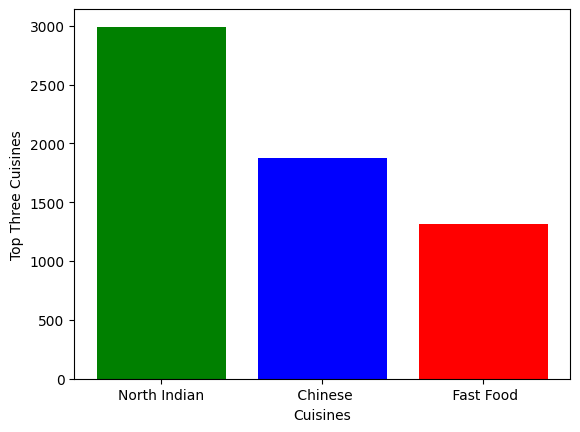

In [9]:
colours=['green','blue','red']
plt.bar(top_cuisine.index,top_cuisine.values,color=colours)
plt.xlabel('Cuisines')
plt.ylabel('Top Three Cuisines')
plt.show()



Calculate the percentage of
restaurants that serve each of the top
cuisines.

In [10]:
total_restaurant=len(df)
print(total_restaurant)
percentage=(top_cuisine/total_restaurant)*100
print(percentage)

9551
Cuisines
North Indian    31.326563
 Chinese        19.683803
 Fast Food      13.757722
Name: count, dtype: float64


Task 2: City Analysis
Identify the city with the highest number
of restaurants in the dataset.

In [11]:
city_count=df['City'].value_counts()
restaurant_highest=city_count.head(1)
print("City with the Highest number of restaurant is:",city_count.idxmax())
print(restaurant_highest)

City with the Highest number of restaurant is: New Delhi
City
New Delhi    5473
Name: count, dtype: int64


Calculate the average rating for
restaurants in each city.


In [12]:
rating_by_each_city=df.groupby('City')['Aggregate rating'].mean()
print("The average rating of each City:",rating_by_each_city)

The average rating of each City: City
Abu Dhabi          4.300000
Agra               3.965000
Ahmedabad          4.161905
Albany             3.555000
Allahabad          3.395000
                     ...   
Weirton            3.900000
Wellington City    4.250000
Winchester Bay     3.200000
Yorkton            3.300000
��stanbul          4.292857
Name: Aggregate rating, Length: 141, dtype: float64


Determine the city with the highest
average rating.


In [13]:
Highest_rating=rating_by_each_city.idxmax()
value=rating_by_each_city.max()
print("The city with the Highest rating:",Highest_rating,",","Rating-",value)

The city with the Highest rating: Inner City , Rating- 4.9


Task 3: Price Range Distribution
Create a histogram or bar chart to
visualize the distribution of price ranges
among the restaurants.

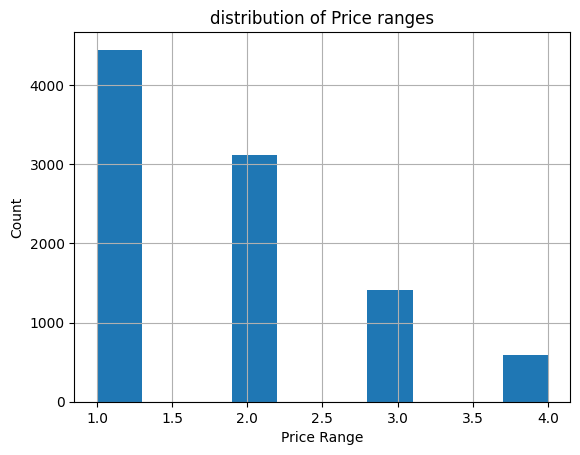

In [14]:

df.hist(column="Price range")
plt.xlabel('Price Range')
plt.ylabel('Count')
plt.title('distribution of Price ranges')
plt.show()

Calculate the percentage of restaurants
in each price range category.

In [15]:
price_range_count=df['Price range'].value_counts()
total_restaurant=len(df)
percentage=round((price_range_count/total_restaurant)*100,2)
percentage_n=pd.merge(price_range_count,percentage,on='Price range')
print(percentage_n)

             count_x  count_y
Price range                  
1               4444    46.53
2               3113    32.59
3               1408    14.74
4                586     6.14


Task 4: Online Delivery
Determine the percentage of restaurants
that offer online delivery.

In [16]:
df['Has Online delivery'] = df['Has Online delivery'].replace({'Yes':1,'No':0})
online_percentage = round((df['Has Online delivery'].sum() / len(df)) * 100,2)
print("The percentage of restaurants that offer online delivery is:",(online_percentage),'%')


The percentage of restaurants that offer online delivery is: 25.66 %


Compare the average ratings of restaurants
with and without online delivery.

In [20]:
avg_rating_with_online_delivery = df[df['Has Online delivery'] == 1]['Aggregate rating'].mean()
avg_rating_without_online_delivery = df[df['Has Online delivery'] == 0]['Aggregate rating'].mean()

print("Average rating with online delivery:", avg_rating_with_delivery)
print("Average rating without online delivery:", avg_rating_without_delivery)

Average rating with online delivery: 3.2488372093023257
Average rating without online delivery: 2.465295774647887
